In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

Import Dataset

In [46]:
df_tele =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

                                 Exploratory Data Analysis

In [47]:
df_tele.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [48]:
df_tele['Count'] = 1
ratios = df_tele.pivot_table(values="Count", index="Churn", aggfunc="sum")
ratios['Percentage'] = (ratios['Count']/ratios['Count'].sum())*100
ratios.head()

,Count,Percentage
Churn,,
No,5174,73.463013
Yes,1869,26.536987


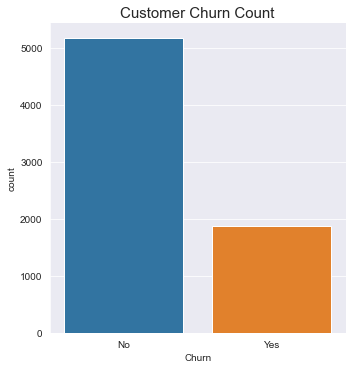

In [49]:
sns.catplot(x='Churn', 
            data=df_tele,
            kind='count')
plt.title('Customer Churn Count',fontsize=15)
plt.show()

The figure above shows us that 1869, 26.5% of the customers in this dataset churned. 5174, 73.5% of the customers stayed with the company.

Lets do some more exploration, and look at some other variables observations

Convert target column into integers

Gender

In [50]:
df_tele['Churn_Binary'] = df_tele['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

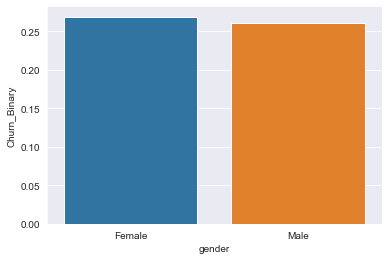

In [51]:
sns.barplot(x='gender',y='Churn_Binary',data=df_tele,ci=False)
plt.show()

Gender has no effect on Churn. Both male and female are leaving at the same rate

Internet Service

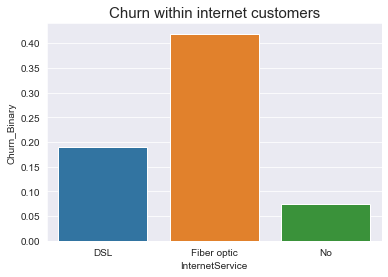

In [52]:
sns.barplot(x='InternetService',y='Churn_Binary',data=df_tele,ci=False)
plt.title('Churn within internet customers',fontsize=15)
plt.show()


43% of the customers that churned services had fiber optic internet service

SeniorCitizen

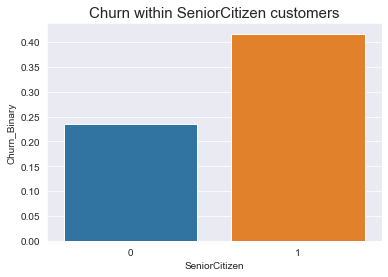

In [53]:
sns.barplot(x='SeniorCitizen',y='Churn_Binary',data=df_tele,ci=False)
plt.title('Churn within SeniorCitizen customers',fontsize=15)
plt.show()


About43% of senior citezen customers are churning services

SeniorCitizen and monthly charges 

In [54]:
df_tele.groupby(['Churn_Binary','SeniorCitizen'])['MonthlyCharges'].mean()

Churn_Binary  SeniorCitizen
0             0                58.618123
              1                79.182057
1             0                72.298098
              1                80.713445
Name: MonthlyCharges, dtype: float64

Senior citizens that churned services had their monthly charges over the average $64. Senior citien customer that churned ervices had monthly charges over $80.7 

MonthlyCharges

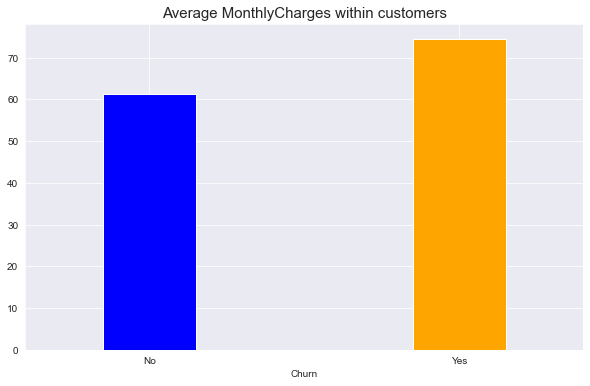

In [55]:
colors = ['blue','orange']
df_tele.groupby(['Churn'])['MonthlyCharges'].mean().plot(kind='bar', width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
plt.title('Average MonthlyCharges within customers',fontsize=15)
plt.show()

The figure above clearly shows that customers that left the company have higher average charges compared to those that were retained.

Tenure and MonthlyCharges

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

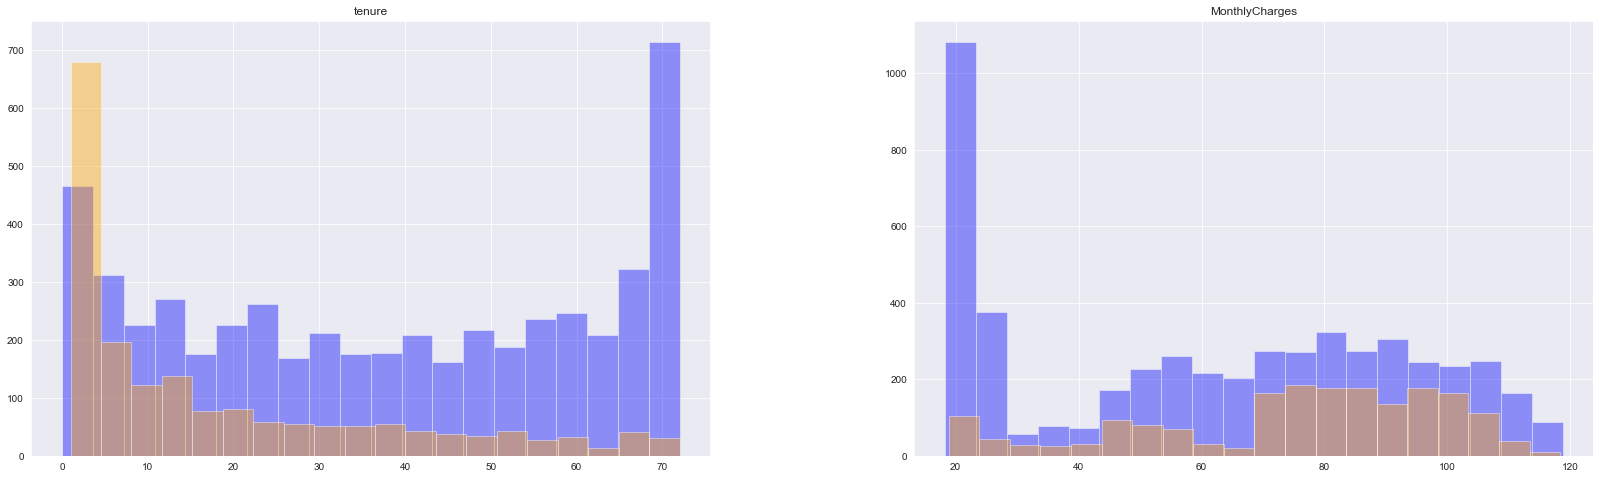

In [56]:
Numeric_var= ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df_tele[df_tele.Churn == 'No'][Numeric_var].hist(bins=20, color="blue", alpha=.4, ax=ax)
df_tele[df_tele.Churn == 'Yes'][Numeric_var].hist(bins=20, color="orange", alpha=.4, ax=ax)

Over 1000 customers stayed with the company, however the monthly charges of those with a high tenure is about $20.Customers that churned in their first month of service had charges over $60 

                              Lets dive into some infrential statistics 

In [57]:
df_tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Count',
       'Churn_Binary'],
      dtype='object')

From the columns above discriptive analysis, we can deduce that the following aren't relevant to our model development based on the subsequent reasons:
-'CustomerID': this is a random identifier for a client and has no bearing on our model
-'gender':  has no effect on Churn. Both male and female are leaving at the same rate
-'Count': we added it simply to infer the chain ratio
The rest of the columns are either numerical,ordinal or categorical, and will therefore play a part in our classification model. We can drop the ones we mentioned above.

In [58]:
df_cleaned = df_tele.drop(['customerID','gender','Count'],axis=1,errors='ignore')

In [59]:
df_cleaned.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binary
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


Data Preprocessing

In [60]:
df_cleaned.describe(include='all')

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binary
count,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000
unique,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2,NaN
top,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No,NaN
freq,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174,NaN
mean,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370
std,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000
25%,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000
50%,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000
75%,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000


The longest tenure is 72 months or 6 years, average tenure is 32 months The maximum monthly charge is $118.75. The minimum monthly charge is $30.09. A customer at this company can expect to have a monthly charge of about $64.76. Assuming the charges are US dollars

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


Most of data type is object, "Yes or No". If we want to do further analysis, and predict churn, we need to be able to look at what variables contribute to churn. Forexample, if we use the linear or logistic regression models, we need to have numeric data. For the next steps, we are going to convert our data into floats or integers. 
Our data will be converted to something like {'No': 0, 'Yes': 1}.

Data cleaning

Lets starte with the TotalCharges column

In [62]:
sorted(df_tele['TotalCharges'].unique())
df_tele['TotalCharges_flot']=pd.to_numeric(df_tele['TotalCharges'], errors='coerce').astype(float)
df_tele['TotalCharges_flot'].dtype
df_tele['TotalCharges_flot']=df_tele['TotalCharges_flot'].fillna(df_tele['TotalCharges_flot'].mean())

In [193]:
sorted(df_tele['TotalCharges'].unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [194]:
df_tele['TotalCharges_flot']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges_flot, Length: 7043, dtype: float64

In [63]:
df_tele.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Count                0
Churn_Binary         0
TotalCharges_flot    0
dtype: int64

Upon checking the dtypes, our new column 'TotalCharges_flot' is a float 

MultipleLines column- has 'No phone service','Yes','No'. We can turn into a binary column by replacing 'No phone service' with 'No'

In [64]:
df_cleaned['MultipleLines'].replace('No phone service', 'No').unique()

array(['No', 'Yes'], dtype=object)

In [65]:
df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies  columns- have 'No internet service','Yes','No'. We can turn them into a binary column by replacing 'No internet service' with 'No'

In [191]:
df_cleaned[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service', 0)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,1,1,0,0,0,0
3,1,0,1,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,1,0,1,1,1,1
7039,0,1,1,0,1,1
7040,1,0,0,0,0,0
7041,0,0,0,0,0,0


In [192]:
 df_cleaned['StreamingMovies'].unique()

array([0, 1, 'No internet service'], dtype=object)

In [67]:
Binary_var= ['gender','Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','PaperlessBilling '
             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ]

In [68]:
ordinal_ver=[['Contract','InternetService']]

In [69]:
nominal_var =['PaymentMethod']

In [70]:
TERGET_COL =['Churn_Binary']

In [71]:
internet_ordering=['No','DSL','Fiber optic']

In [72]:
Contract_ordering=['Month-to-month', 'One year', 'Two year']

In [73]:
 df_cleaned.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [183]:
 df_cleaned['StreamingTV'].unique()

array([0, 1, 'No internet service'], dtype=object)

In [74]:
InternetService = pd.get_dummies(df_cleaned.InternetService).iloc[:,1:]

In [75]:
InternetService.head()

,DSL,Fiber optic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


We can see from the dataframe produced above that our method worked. Now for the 'InternetService' column.

In [76]:
df_cleaned.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'Contract' has 3 unique values. If we simply attach numbers to correspond to the different cities, {'Month-to-month':0, 'One year':1, 'Two year':2}, the algorithm we design later will think that we assigned the numbers in order of importance. This is because of the ascension 0-1-2. This is something we don't want. The solution to this is once again one-hot encoding, but in a manner in which we only have 0s and 1s.

In [77]:
Contract = pd.get_dummies(df_cleaned.Contract).iloc[:,1:]

In [78]:
Contract.head()

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [79]:
df_cleaned.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [80]:
PaymentMethod = pd.get_dummies(df_cleaned.PaymentMethod).iloc[:,1:]

In [81]:
PaymentMethod.head()

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


As we can see from the dataframe above, we have 3 columns, Credit card (automatic),Electronic check, Mailed check.
In fact, we can also apply this reasoning to the Contract dataframe we generated earlier. If we remove the first column, we can always infer its value as the opposite of the one that remains.

In [82]:
df_cleaned.drop(['Contract','InternetService','PaymentMethod'],axis=1,inplace=True,errors='ignore')

In [83]:
df_cleaned = pd.concat([df_cleaned,Contract,InternetService,PaymentMethod], axis=1)

In [84]:
df_cleaned.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,Churn_Binary,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,0,0,0,1,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.5,0,0,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,1,0,0,1,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,1,0,0,0,1,0,1,0


In [85]:
pd.set_option("display.max_columns", None)

df_cleaned.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Binary,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,1,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0


Now that we've an entirely numerical dataset, we can move on to developing the model.

In [86]:
df_cleaned['OnlineSecurity_Binary'] = df_cleaned['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)

In [87]:
df_cleaned['OnlineBackup_Binary'] =df_cleaned['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)

In [88]:
df_cleaned['DeviceProtection_Binary'] = df_cleaned['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)

In [89]:
df_cleaned['TechSupport_Binary'] = df_cleaned['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

In [90]:
df_cleaned['StreamingTV_Binary'] = df_cleaned['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)

In [91]:
df_cleaned['StreamingMovies_Binary'] = df_cleaned['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)

In [135]:
df_cleaned2=df_cleaned.drop(['TotalCharges_flot','TotalCharges','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'],axis=1,errors='ignore')     

In [181]:
df_cleaned['OnlineBackup_Binary'] .unique()

array([0], dtype=int64)

       My model, Df_cleaned upto this point when i renamed the data frame to new name df_cleaned2. the model, is detecting the TotalCharges column (tc) as an object. In order to forward with my prediction, lets temporary drop TotalCharges columns. We have Monthly charges column which is very similar to tc

In [136]:
df_cleaned2.dtypes

SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
PaperlessBilling             int64
MonthlyCharges             float64
Churn                        int64
Churn_Binary                 int64
One year                     uint8
Two year                     uint8
DSL                          uint8
Fiber optic                  uint8
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
OnlineSecurity_Binary        int64
OnlineBackup_Binary          int64
DeviceProtection_Binary      int64
TechSupport_Binary           int64
StreamingTV_Binary           int64
StreamingMovies_Binary       int64
dtype: object

In [137]:
df_cleaned2.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'Churn_Binary', 'One year', 'Two year', 'DSL', 'Fiber optic',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'OnlineSecurity_Binary', 'OnlineBackup_Binary',
       'DeviceProtection_Binary', 'TechSupport_Binary', 'StreamingTV_Binary',
       'StreamingMovies_Binary'],
      dtype='object')

In [138]:
df_cleaned.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,Churn_Binary,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,StreamingTV_Binary,StreamingMovies_Binary
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.592219,64.761692,0.265370,0.265370,0.209144,0.240664,0.343746,0.439585,0.216101,0.335794,0.228880,0.0,0.0,0.0,0.0,0.0,0.0
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.491457,30.090047,0.441561,0.441561,0.406726,0.427517,0.474991,0.496372,0.411613,0.472301,0.420141,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


The longest tenure is 72 months or 6 years, average tenure is 32 months
The maximum monthly charge is $118.75. The minimum monthly charge is about $30.09. 
The customer can expect to have a monthly charge of about $64.76. Assuming the charges are US dollars 

In [173]:
df_cleaned2.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,Churn_Binary,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,StreamingTV_Binary,StreamingMovies_Binary
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.156530,0.220173,0.150889,0.150889,-0.046262,-0.117000,-0.108322,0.255338,-0.024135,0.171718,-0.153477,NaN,NaN,NaN,NaN,NaN,NaN
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.014877,0.096848,-0.150448,-0.150448,0.082783,0.248091,-0.000851,0.000304,0.082029,-0.083852,-0.095125,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.111377,-0.113890,-0.164221,-0.164221,0.068368,0.204613,0.052010,-0.165818,0.060267,-0.150642,0.059071,NaN,NaN,NaN,NaN,NaN,NaN
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.006152,0.247900,-0.352229,-0.352229,0.202570,0.558533,0.013274,0.019720,0.233006,-0.208363,-0.233852,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.016505,0.247398,0.011942,0.011942,-0.002791,0.003519,-0.452425,0.289999,-0.007721,0.003062,-0.003319,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.163530,0.490434,0.040102,0.040102,-0.003794,0.106253,-0.199920,0.366083,0.060048,0.083618,-0.227206,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,0.163530,1.000000,0.352150,0.191825,0.191825,-0.051391,-0.147889,-0.063121,0.326853,-0.013589,0.208865,-0.205398,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.490434,0.352150,1.000000,0.193356,0.193356,0.004904,-0.074681,-0.160189,0.787066,0.030550,0.271625,-0.377437,NaN,NaN,NaN,NaN,NaN,NaN
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,1.000000,1.000000,-0.177820,-0.302253,-0.124214,0.308020,-0.134302,0.301919,-0.091683,NaN,NaN,NaN,NaN,NaN,NaN
Churn_Binary,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,0.191825,0.193356,1.000000,1.000000,-0.177820,-0.302253,-0.124214,0.308020,-0.134302,0.301919,-0.091683,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_cleaned2['TechSupport_Binary']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: TechSupport_Binary, Length: 7043, dtype: int64

why i am i getting nan values here?

In [175]:
df_cleaned2['OnlineSecurity_Binary'].unique()

array([0], dtype=int64)

From the figure below, Total charges and tenure are closely related with a correlation coefficient of 0.83 and 0.25 respectively. Tenure and Churn are inversly related with a correlation coefficient of -0.35

<AxesSubplot:>

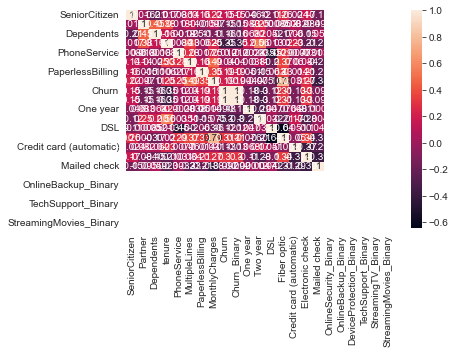

In [172]:
df_cleaned2.corr()
sns.heatmap(df_cleaned2.corr(),annot=True)

In [143]:
x=df_cleaned2[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'PaperlessBilling',
       'MonthlyCharges','One year', 'Two year',
       'DSL', 'Fiber optic', 'Credit card (automatic)', 'Electronic check',
       'Mailed check', 'OnlineSecurity_Binary', 'OnlineBackup_Binary',
       'DeviceProtection_Binary', 'TechSupport_Binary', 'StreamingTV_Binary',
       'StreamingMovies_Binary']]

In [144]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   tenure                   7043 non-null   int64  
 4   PhoneService             7043 non-null   int64  
 5   MultipleLines            7043 non-null   int64  
 6   PaperlessBilling         7043 non-null   int64  
 7   MonthlyCharges           7043 non-null   float64
 8   Churn                    7043 non-null   int64  
 9   Churn_Binary             7043 non-null   int64  
 10  One year                 7043 non-null   uint8  
 11  Two year                 7043 non-null   uint8  
 12  DSL                      7043 non-null   uint8  
 13  Fiber optic              7043 non-null   uint8  
 14  Credit card (automatic) 

In [145]:
y= df_cleaned2['Churn_Binary']

In [146]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,StreamingTV_Binary,StreamingMovies_Binary
0,0,1,0,1,0,0,1,29.85,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,34,1,0,0,56.95,1,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,2,1,0,1,53.85,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,45,0,0,0,42.30,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,1,0,1,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,84.80,1,0,1,0,0,0,1,0,0,0,0,0,0
7039,0,1,1,72,1,1,1,103.20,1,0,0,1,1,0,0,0,0,0,0,0,0
7040,0,1,1,11,0,0,1,29.60,0,0,1,0,0,1,0,0,0,0,0,0,0
7041,1,1,0,4,1,1,1,74.40,0,0,0,1,0,0,1,0,0,0,0,0,0


In [147]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Binary, Length: 7043, dtype: int64

Above, we defined 'y' as our label set, as it is the one we're going to be using for classification. It contains the decision markers of what constitutes a churned customer and what doesn't. It is the column from which the model is going to infer a prediction from.

As for 'X', it is our feature set. It contains the combination of features on which the decision in the labe' column is based.

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
columns = x_train.columns

In [150]:
x_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,StreamingTV_Binary,StreamingMovies_Binary
3381,0,0,0,41,1,0,1,79.85,1,0,1,0,0,0,0,0,0,0,0,0,0
6180,1,0,0,66,1,1,1,102.40,0,1,0,1,0,0,0,0,0,0,0,0,0
4829,0,0,0,12,1,0,1,45.00,0,0,1,0,0,0,0,0,0,0,0,0,0
3737,0,0,0,5,1,1,1,50.60,0,0,1,0,0,0,1,0,0,0,0,0,0
4249,0,1,1,10,1,0,1,65.90,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,1,0,0,25,1,1,0,105.95,0,0,0,1,0,0,1,0,0,0,0,0,0
2028,0,0,0,15,1,0,0,19.60,0,1,0,0,0,0,1,0,0,0,0,0,0
2899,0,0,0,71,0,0,0,53.95,0,1,1,0,0,0,0,0,0,0,0,0,0
3474,1,1,1,65,1,1,1,85.75,0,0,0,1,0,1,0,0,0,0,0,0,0


In [151]:
x_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,One year,Two year,DSL,Fiber optic,Credit card (automatic),Electronic check,Mailed check,OnlineSecurity_Binary,OnlineBackup_Binary,DeviceProtection_Binary,TechSupport_Binary,StreamingTV_Binary,StreamingMovies_Binary
1814,0,1,1,12,1,0,0,19.70,0,1,0,0,0,0,1,0,0,0,0,0,0
5946,0,0,0,42,1,0,0,73.90,1,0,1,0,1,0,0,0,0,0,0,0,0
3881,0,1,0,71,1,1,0,65.15,0,1,1,0,0,0,0,0,0,0,0,0,0
2389,0,1,1,71,1,1,0,85.45,1,0,1,0,0,1,0,0,0,0,0,0,0
3676,0,0,0,30,1,0,0,70.40,1,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,0,0,9,1,1,1,100.50,0,0,0,1,0,1,0,0,0,0,0,0,0
5192,0,0,1,60,1,0,0,19.95,0,1,0,0,0,0,1,0,0,0,0,0,0
3980,0,0,0,28,1,1,1,105.70,0,0,0,1,0,1,0,0,0,0,0,0,0
235,0,0,0,2,1,1,1,54.40,0,0,1,0,0,0,1,0,0,0,0,0,0


Fitting and Predicting the Model

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model =LogisticRegression()

In [154]:
model.fit(x_train, y_train)

C:\Users\hotsa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [156]:
model.score(x_train, y_train)

0.8003194888178914

Our model has an accuracy score of 80%. Quite an acceptable figure. Now let's build a model using the entire dataset.

In [157]:
model.predict_proba(x_test)

array([[0.91562496, 0.08437504],
       [0.93436402, 0.06563598],
       [0.73562598, 0.26437402],
       ...,
       [0.98599228, 0.01400772],
       [0.72532083, 0.27467917],
       [0.30227722, 0.69772278]])

Fitting and Predicting the Model

In [168]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [169]:
predictions = classifier.predict(x_test)

In [170]:
print(accuracy_score(y_test, predictions))

0.7934705464868701


In [167]:
feat_importances = pd.Series(classifier.feature_importances_, index=x.columns).sort_values(ascending=False)
feat_importances.head()

MonthlyCharges      0.357608
tenure              0.312852
Fiber optic         0.043901
Two year            0.043651
Electronic check    0.043161
dtype: float64

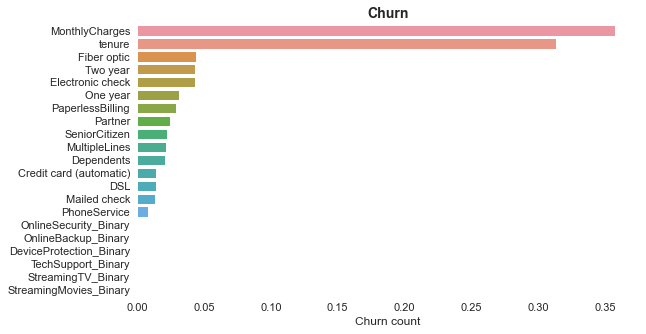

In [166]:
sns.set_style("white")
sns.set_palette("husl", 12)

plt.figure(figsize=(9,5))
ax = sns.barplot(x=feat_importances, y=feat_importances.index, orient="h")
ax.set_ylabel("")
ax.set_xlabel("Churn count", fontsize=12)
ax.set_title("Churn", fontweight="bold", fontsize=14)
ax.tick_params(labelsize=11)

sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
plt.show()

From the barplot above, we can deduce that 'MonthlyCharges' is the largest contributor to our model.

Conclusion

Earlier, we noted that close to 26% of the clients in this dataset churned. Now we have a model that can predict churn with 80% accuracy. We can now direct resources towards connecting with customers directly. There seems to be a gap around customer contact. From our model, it looks like customers that have high monthly charges and use electronic check are more likely to leave the company.Engaging with customers in the first month of service; and teaching them how to get the most out of their service, offering incentives such as discounts and special offers to those customers whose monthly charges are above the average $64 who were identified as likely to churn. 

Implementing the solutions above would help the company in retaining the customers that are likely to leave the company according to our model. This will save the company money because it is always cheaper to keep an existing client, than to search for a new one